### Feature Selection Based On Univariant (ANOVA) test for classification.

##### What is the Univariant test ?

The elimination process aims to reduce the size of the input feature set and at the same time to retain the class discreminatory information for classification problems.In simple word unwanted feature are removed for getting the proper and input features and at the same time it we get the proper information for classification problem.
In that we taking the analysis of the variance i.e.ANOVA is can be thought as an extension of the T-test 
Thde independent T-test is used to comapare the mean of the condition between two groups although this ANOVA test is based on F-Test.F-Test is any stastical test in which test stastic has an F-distributions under the null hypothesis.

An F-Test is any stastical test in which the test stastic has an F-distribution under the null hypothesis.

Analysis of variance (ANOVA) is collection of stastical models and their associated estimation procedures(such as the 'variation' among and between groups) used to analyze the diffrences among group means in a sample 

In the T-test we compare the mean from the two groups but in ANOVA we compre the mean of the groups which two or more than two groups

F-test is used to comparing the factors of the total deviation.For example,in one-way or single factor ANOVA stastical significance is tested for by comparing the F-test stastic.

The ANOVA was developed by stastacian Rounald Fisher that is also known as F-test . The ANOVA is based on the law of the total variance where the observed variance in particular variable particant into the attribute to the diffrent source of the variation.
F = variance between the features/variance within the features 

We having the choices of ANOVA according to that we have to use it like f_classif,f_regression.

### Classification:-

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif,f_regression
from sklearn.feature_selection import SelectKBest,SelectPercentile

In [38]:
data = pd.read_csv('santander-train.csv',nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [39]:
x = data.drop('TARGET',axis =1)
y = data['TARGET']
x.shape , y.shape

((20000, 370), (20000,))

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =.8,random_state =0,stratify=y)

Remove the constant,Quasi constant and correlated features 

In [41]:
#remove the constant and quasi constant 
constant_filter = VarianceThreshold(0.01)
constant_filter.fit(x_train)
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

In [42]:
x_train_filter.shape,x_test_filter.shape

((16000, 245), (4000, 245))

In [ ]:
#Remove the duplicate features

In [43]:
x_train_T= x_train_filter.T
x_test_T = x_test_filter.T

In [44]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T  = pd.DataFrame(x_test_T)

In [45]:
x_train_T.duplicated().sum()

18

In [46]:
duplicated_features = x_train_T.duplicated()

In [47]:
features_to_keep = [not index for index in duplicated_features ]

In [48]:
features_to_keep = [not index for index in duplicated_features ]
x_train_unique = x_train_T[features_to_keep].T
x_test_unique = x_test_T[features_to_keep].T

In [49]:
x_train_unique.shape,x_train.shape

((16000, 227), (16000, 370))

#### NOW DO F-Test

In [50]:
sel = f_classif(x_train_unique,y_train)
sel
#we got the two arrays that are the f and p array

(array([3.42911520e-01, 1.22929093e+00, 1.61291330e+02, 4.01025132e-01,
        8.37661151e-01, 2.39279390e-03, 4.41633351e-02, 1.36337510e-01,
        1.84647123e+00, 2.03640367e+00, 7.98057954e-03, 1.14063993e+00,
        6.32266614e-03, 1.55626237e+01, 1.53553790e+01, 1.28615978e+01,
        1.61834746e+01, 1.59638013e+01, 1.21977511e+01, 9.03776687e-02,
        1.00443179e+00, 1.53946148e+01, 2.50428951e+02, 2.98696944e+01,
        1.06266841e+01, 2.63630437e+01, 1.66417611e+01, 3.13699473e+01,
        2.47256550e+01, 2.60021376e+01, 3.26742018e+01, 9.94259060e+00,
        1.48208220e+01, 1.50040146e+01, 1.34739830e+01, 7.03118653e+00,
        1.36234772e+01, 7.95962134e+00, 3.15161070e+02, 1.79631284e+00,
        1.66910747e+00, 1.21138302e+01, 1.10928892e+01, 1.00443179e+00,
        2.31851572e+00, 8.93973153e+01, 7.53868668e+00, 2.38490562e+02,
        2.98696944e+01, 1.06266841e+01, 2.61694409e+01, 1.66053267e+01,
        2.93013259e+01, 2.44433356e+01, 2.60021376e+01, 5.596238

In [ ]:
#the p values which less than the 0.05 then this kind p values are very important.

In [51]:
import pandas as pd
p_values = pd.Series(sel[1])
p_values.index = x_train_unique.columns
p_values.sort_values(ascending=True,inplace=True)

In [52]:
len(p_values)

227

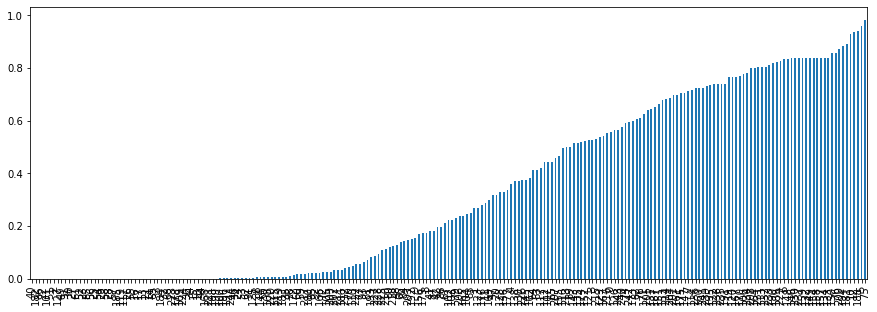

In [53]:
p_values.plot.bar(figsize = (15,5))

By watching above figure the data having the large number of quantity but want seleted feature therotically we required this kind of feature who havinng the magnitude less than 0.05.

In [27]:
p_values[p_values<0.05]
len(p_values[p_values<0.05])

88

In [54]:
p_values.index

Int64Index([ 40, 182,  86,  22, 101,  51,   2, 127,  49,  91,
            ...
            150,  76, 200, 194, 181,  10,  12, 188,   5,  75],
           dtype='int64', length=227)

In [55]:
x_train_p = x_train_unique[p_values.index]
x_test_p  = x_test_unique[p_values.index]

In [56]:
def randomforest(x_train,x_test,y_train,y_test):
    clf = RandomForestClassifier(random_state=0,n_jobs=-1,n_estimators=1000)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy :' , accuracy_score(y_test,y_pred))

In [57]:
%%time
randomforest(x_train_p,x_test_p,y_train,y_test)

Accuracy : 0.9585
Wall time: 23.4 s


In [62]:
%%time
randomforest(x_train,x_test,y_train,y_test)

Accuracy : 0.959
Wall time: 29 s


If we observed that there is time that magic time taken for the computation is higher  than the previous if we use the whole data in train and test split.